<H2>課題2-1: 一元分散分析</H2>
<p>A社は、エタノールを製造・販売しています。5本の製造ラインがありますが、これらのラインにより製品の濃度に差がないかどうかを確認したく思います。5本のライン(A, B, C, D, E)から10回ずつサンプリングを行い測定を行った結果が *dataset/data1.csv* です（データ数の合計：50件）。このデータを一元分散分析にて解析し、結論を出してみましょう。</p>
<p>レッスン7までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み¶</H2>

In [63]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

<H2>2. データの読み込み</H2>

In [64]:
# データを読み込んで変数 data に格納
data = pd.read_csv('dataset/data1.csv')

In [65]:
# データの最初の5行だけ表示
data.head()

,Density,Line
0,71.624345,A
1,69.388244,A
2,69.471828,A
3,68.927031,A
4,70.865408,A


<H2>3. データ内容の把握</H2>

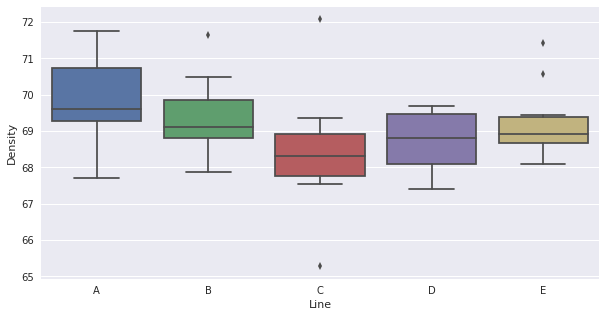

In [66]:
# （データ数が多くはないので）箱髭図にて製造ラインごとの濃度を表示
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(x='Line', y='Density', data=data, ax=ax)

<H2>4. 分散分析</H2>
<p>ここでは理解を深めるために手動で計算して理解を深めましょう。</p>

<H3>4-1. 群間・群内平方和の計算</H3>

In [67]:
# ラインの持つ影響（ラインによる影響を考えた場合の濃度）
mu_all = sp.mean(data['Density'])
me_A = sp.mean(data.query('Line=="A"')['Density'])
me_B = sp.mean(data.query('Line=="B"')['Density'])
me_C = sp.mean(data.query('Line=="C"')['Density'])
me_D = sp.mean(data.query('Line=="D"')['Density'])
me_E = sp.mean(data.query('Line=="E"')['Density'])

print('mu_all:', mu_all)
print('mean_A:', me_A)
print('mean_B:', me_B)
print('mean_C:', me_C)
print('mean_D:', me_D)
print('mean_E:', me_E)

mu_all: 69.13448967999292
mean_A: 69.9028591091939
mean_B: 69.36865005840153
mean_C: 68.42904350984494
mean_D: 68.73809656689362
mean_E: 69.23379915563065


In [68]:
effect = [me_A]*10 + [me_B]*10 + [me_C]*10 + [me_D]*10 + [me_E]*10
effect = np.array(effect)
effect

array([69.90285911, 69.90285911, 69.90285911, 69.90285911, 69.90285911,
       69.90285911, 69.90285911, 69.90285911, 69.90285911, 69.90285911,
       69.36865006, 69.36865006, 69.36865006, 69.36865006, 69.36865006,
       69.36865006, 69.36865006, 69.36865006, 69.36865006, 69.36865006,
       68.42904351, 68.42904351, 68.42904351, 68.42904351, 68.42904351,
       68.42904351, 68.42904351, 68.42904351, 68.42904351, 68.42904351,
       68.73809657, 68.73809657, 68.73809657, 68.73809657, 68.73809657,
       68.73809657, 68.73809657, 68.73809657, 68.73809657, 68.73809657,
       69.23379916, 69.23379916, 69.23379916, 69.23379916, 69.23379916,
       69.23379916, 69.23379916, 69.23379916, 69.23379916, 69.23379916])

In [69]:
#　群間の平方和を求める
squares_Line = sp.sum((effect - mu_all)**2)
squares_Line

13.098668335875422

In [70]:
#　群間の誤差を求める
resid = data['Density'] - effect

In [71]:
#　群内（=誤差）の平方和を求める 
squares_resid = sp.sum(resid**2)
squares_resid

67.40695311278058

<H3>4-2. 群間・群内分散の計算</H3>

In [72]:
 # 群間変動の自由度を変数 df_model に格納し、群内変動(誤差）の自由度を変数 df_resid に格納する
df_model = 5-1
df_resid = (len(data)-1) - (df_model)

In [73]:
# 群間の平均平方（分散）を求める
variance_Line = squares_Line / df_model
variance_Line

3.2746670839688554

In [74]:
# 群内の平均平方（分散）を求める
variance_resid = squares_resid / df_resid
variance_resid

1.497932291395124

<H3>4-3. p値の計算</H3>

In [77]:
# F比を求める
f_ratio_Line = variance_Line / variance_resid
f_ratio_Line

2.186124902160257

In [79]:
# p値を求めて、表示する
1 - sp.stats.f.cdf(x=f_ratio_Line, dfn=df_model, dfd=df_resid)

0.08574964851206801

<H2>5. Statsmodelsによる分散分析</H2>
<p>実務ではStatsmodelsを使って実行していくことになります。次に、Statsmodelsのパッケージを用いて計算してみましょう。</p>

In [80]:
# 最小二乗法を使ってモデルを作成
anova_model = smf.ols('Density ~ Line', data=data).fit()

In [81]:
# Statsmodelsの関数で分散分析を実行し、結果を表示
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
Line,13.098668,4.0,2.186125,0.08575
Residual,67.406953,45.0,NaN,NaN


手動で計算した場合と結果は一致しましたか？

<H2>6. 結果の解釈</H2>

ラインによって、製品の濃度は「差があるとは言い切れない」と判断できる

*補足：有意差がみられた場合、これは化学メーカーとしては問題ですので製造ラインの詳細を確認する必要があります。*